# <font color=blue>Chapter 1:  Dates and Times in R</font>

In [3]:
library(readr)
# There is also the anytime() function in the anytime package
# whose sole goal is to automatically parse strings as dates regardless of the format.
library(anytime)
library(ggplot2)
library(dplyr)
library(lubridate)
library(ggridges)
library(hms)
library(microbenchmark)
library(fasttime)
options(repr.plot.width = 8, repr.plot.height = 4)

#### Specifying dates

In [1]:
# The date R 3.0.0 was released
x <- "2013-04-03"

# Examine structure of x
str(x)

# Use as.Date() to interpret x as a date
x_date <- as.Date(x)

# Examine structure of x_date
str(x_date)

# Store April 10 2014 as a Date
april_10_2014 <- as.Date("2014-04-10")

 chr "2013-04-03"
 Date[1:1], format: "2013-04-03"


#### Automatic import

In [6]:
# Use read_csv() to import rversions.csv
releases <- read_csv("rversions.csv")

# Examine the structure of the date column
str(releases$date)

# Various ways of writing Sep 10 2009
sep_10_2009 <- c("September 10 2009", "2009-09-10", "10 Sep 2009", "09-10-2009")

# Use anytime() to parse sep_10_2009
anytime(sep_10_2009)

Parsed with column specification:
cols(
  major = col_integer(),
  minor = col_integer(),
  patch = col_integer(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


 Date[1:105], format: "1997-12-04" "1997-12-21" "1998-01-10" "1998-03-14" "1998-05-02" ...


[1] "2009-09-10 CEST" "2009-09-10 CEST" "2009-09-10 CEST" "2009-09-10 CEST"

#### Plotting

Warning message:
"Removed 87 rows containing missing values (geom_path)."

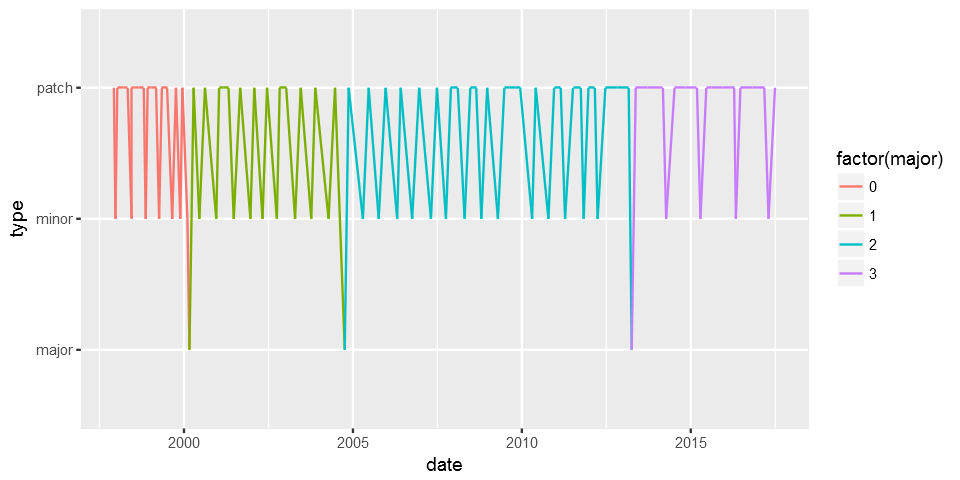

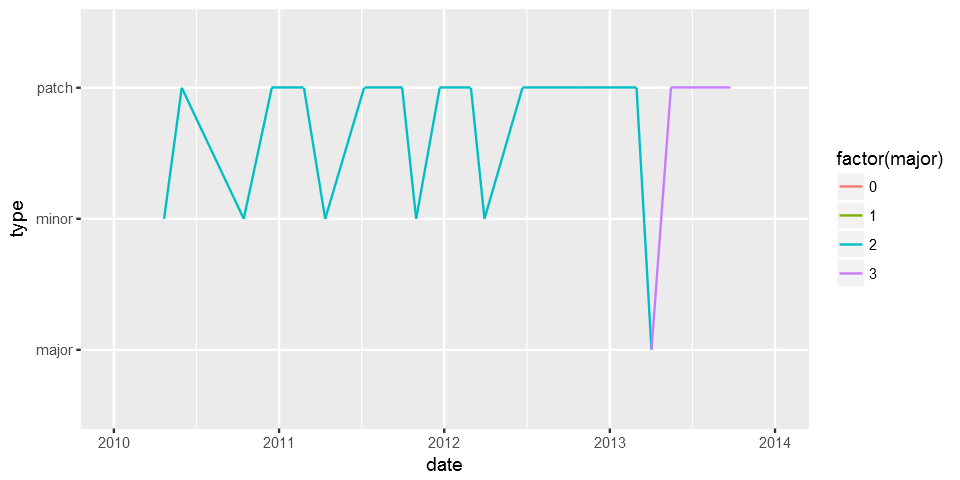

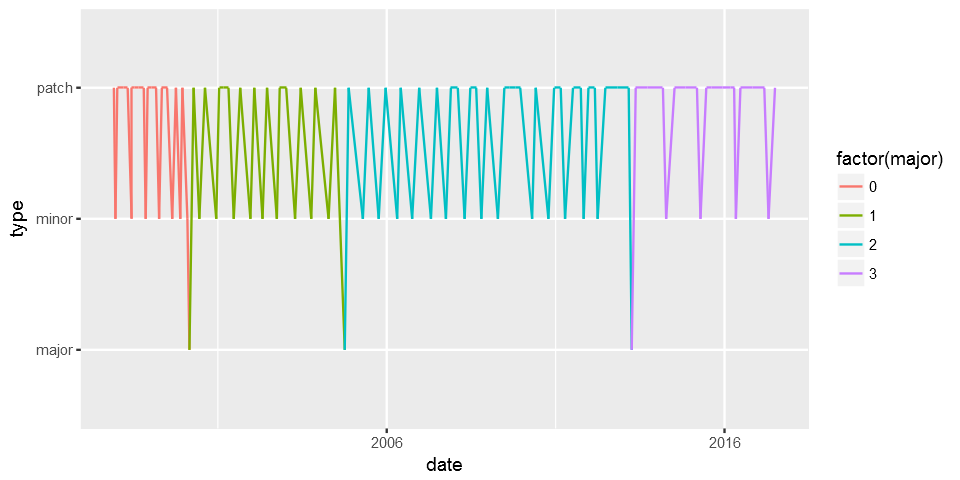

In [11]:
# Set the x axis to the date column
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major)))

# Limit the axis to between 2010-01-01 and 2014-01-01
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  xlim(as.Date("2010-01-01"), as.Date("2014-01-01"))

# Specify breaks every ten years and labels with "%Y"
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  scale_x_date(date_breaks = "10 years", date_labels = "%Y")

#### Arithmetic and logical operators

In [23]:
# Find the largest date
last_release_date <- max(releases$date)

# Filter row for last release
last_release <- filter(releases, date == last_release_date)

# Print last_release
last_release

# How long since last release?
Sys.Date() - last_release_date

Warning message in data.matrix(data):
"NAs durch Umwandlung erzeugt"

ERROR: Error in `==.default`(date, last_release_date): Vergleich (1) ist nur für atomare und Listentypen möglich


In [22]:
str(last_release_date)

 Date[1:1], format: "2017-06-30"


#### Getting datetimes into R

In [3]:
# Use as.POSIXct to enter the datetime 
as.POSIXct("2010-10-01 12:12:00")

# Use as.POSIXct again but set the timezone to `"America/Los_Angeles"`
as.POSIXct("2010-10-01 12:12:00", tz = "America/Los_Angeles")

# Use read_csv to import rversions.csv
releases <- read_csv("rversions.csv")

# Examine structure of datetime column
str(releases$datetime)

[1] "2010-10-01 12:12:00 CEST"

[1] "2010-10-01 12:12:00 PDT"

Parsed with column specification:
cols(
  major = col_integer(),
  minor = col_integer(),
  patch = col_integer(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


 POSIXct[1:105], format: "1997-12-04 08:47:58" "1997-12-21 13:09:22" "1998-01-10 00:31:55" ...


#### Datetimes behave nicely too

Parsed with column specification:
cols(
  datetime = col_datetime(format = ""),
  r_version = col_character(),
  country = col_character()
)


datetime,r_version,country
2015-04-16 22:40:19,3.1.3,CO
2015-04-16 09:11:04,3.1.3,GB
2015-04-16 17:12:37,3.1.3,DE
2015-04-18 12:34:43,3.2.0,GB
2015-04-16 04:49:18,3.1.3,PE
2015-04-16 06:40:44,3.1.3,TW
2015-04-16 00:21:36,3.1.3,US
2015-04-16 10:27:23,3.1.3,US
2015-04-16 01:59:43,3.1.3,SG
2015-04-18 15:41:32,3.2.0,CA


datetime,r_version,country
2015-04-18 12:34:43,3.2.0,GB
2015-04-18 15:41:32,3.2.0,CA
2015-04-18 14:58:41,3.2.0,IE
2015-04-18 16:44:45,3.2.0,US
2015-04-18 04:34:35,3.2.0,US
2015-04-18 22:29:45,3.2.0,CH
2015-04-17 16:21:06,3.2.0,US
2015-04-18 20:34:57,3.2.0,AT
2015-04-17 18:23:19,3.2.0,US
2015-04-18 03:00:31,3.2.0,US


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


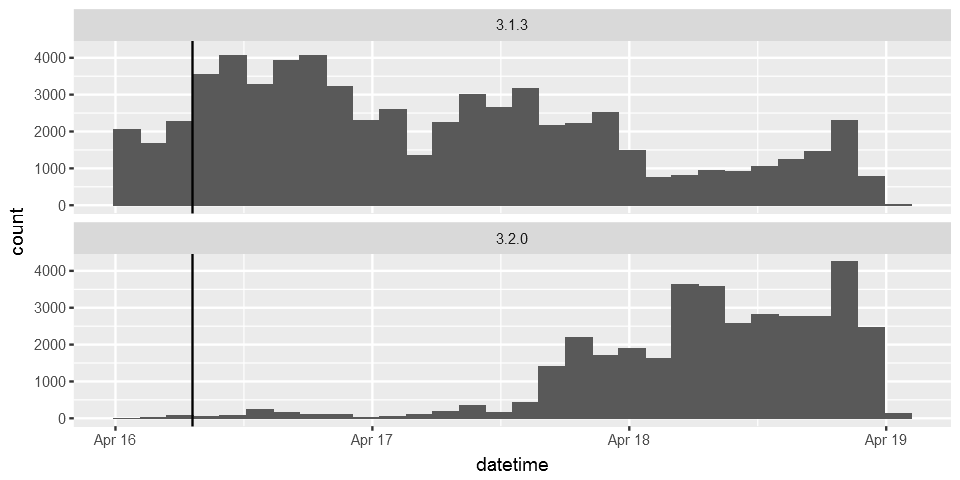

In [7]:
# Import "cran-logs_2015-04-17.csv" with read_csv()
logs <- read_csv("cran-logs_2015-04-17.csv")

# Print logs
logs

# Store the release time as a POSIXct object
release_time <- as.POSIXct("2015-04-16 07:13:33", tz = "UTC")

# When is the first download of 3.2.0?
logs %>% 
  filter(datetime > release_time,
    r_version == "3.2.0")

# Examine histograms of downloads by version
ggplot(logs, aes(x = datetime)) +
  geom_histogram() +
  geom_vline(aes(xintercept = as.numeric(release_time)))+
  facet_wrap(~ r_version, ncol = 1)

# <font color=blue>Chapter 2:  Parsing and Manipulating Dates and Times with lubridate</font>

#### Selecting the right parsing function

In [9]:
# Parse x 
x <- "2010 September 20th" # 2010-09-20
ymd(x)

# Parse y 
y <- "02.01.2010"  # 2010-01-02
dmy(y)

# Parse z 
z <- "Sep, 12th 2010 14:00"  # 2010-09-12T14:00
mdy_hm(z)

[1] "2010-09-20"

[1] "2010-01-02"

[1] "2010-09-12 14:00:00 UTC"

#### Specifying an order with `parse_date_time()`

In [16]:
# https://github.com/tidyverse/lubridate/issues/366
Sys.setlocale(category = "LC_TIME", locale = "English_United States.1252")

# Specify an order string to parse x
x <- "Monday June 1st 2010 at 4pm"
parse_date_time(x, orders = "AmdyIp")

# Specify order to include both "mdy" and "dmy"
two_orders <- c("October 7, 2001", "October 13, 2002", "April 13, 2003", 
  "17 April 2005", "23 April 2017")
parse_date_time(two_orders, orders = c("mdy", "dmy"))

# Specify order to include "dOmY", "OmY" and "Y"
short_dates <- c("11 December 1282", "May 1372", "1253")
parse_date_time(short_dates, orders = c("dOmY", "OmY", "Y"))

[1] "English_United States.1252"

[1] "2010-06-01 16:00:00 UTC"

[1] "2001-10-07 UTC" "2002-10-13 UTC" "2003-04-13 UTC" "2005-04-17 UTC"
[5] "2017-04-23 UTC"

[1] "1282-12-11 UTC" "1372-05-01 UTC" "1253-01-01 UTC"

#### Import daily weather data

In [1]:
# Import "akl_weather_hourly_2016.csv"
akl_hourly_raw <- read_csv("akl_weather_hourly_2016.csv")

# Print akl_hourly_raw
akl_hourly_raw

# Use make_date() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )

# Print date, time and datetime columns of akl_hourly
akl_hourly %>% select(date, time, datetime)

# Plot to check work
ggplot(akl_hourly, aes(x = datetime, y = temperature)) + geom_line()

ERROR: Error in read_csv("akl_weather_hourly_2016.csv"): konnte Funktion "read_csv" nicht finden


Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  mday = col_integer(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_integer(),
  date_utc = col_datetime(format = "")
)


year,month,mday,time,temperature,weather,conditions,events,humidity,date_utc
2016,1,1,00:00:00,68.0,Clear,Clear,NA,68,2015-12-31 11:00:00
2016,1,1,00:30:00,68.0,Clear,Clear,NA,68,2015-12-31 11:30:00
2016,1,1,01:00:00,68.0,Clear,Clear,NA,73,2015-12-31 12:00:00
2016,1,1,01:30:00,68.0,Clear,Clear,NA,68,2015-12-31 12:30:00
2016,1,1,02:00:00,68.0,Clear,Clear,NA,68,2015-12-31 13:00:00
2016,1,1,02:30:00,68.0,Clear,Clear,NA,68,2015-12-31 13:30:00
2016,1,1,03:00:00,68.0,Clear,Clear,NA,68,2015-12-31 14:00:00
2016,1,1,03:30:00,68.0,Cloudy,Partly Cloudy,NA,68,2015-12-31 14:30:00
2016,1,1,04:00:00,68.0,Cloudy,Scattered Clouds,NA,68,2015-12-31 15:00:00
2016,1,1,04:30:00,66.2,Cloudy,Partly Cloudy,NA,73,2015-12-31 15:30:00


date,time,datetime
2016-01-01,00:00:00,2016-01-01
2016-01-01,00:30:00,2016-01-01
2016-01-01,01:00:00,2016-01-01
2016-01-01,01:30:00,2016-01-01
2016-01-01,02:00:00,2016-01-01
2016-01-01,02:30:00,2016-01-01
2016-01-01,03:00:00,2016-01-01
2016-01-01,03:30:00,2016-01-01
2016-01-01,04:00:00,2016-01-01
2016-01-01,04:30:00,2016-01-01


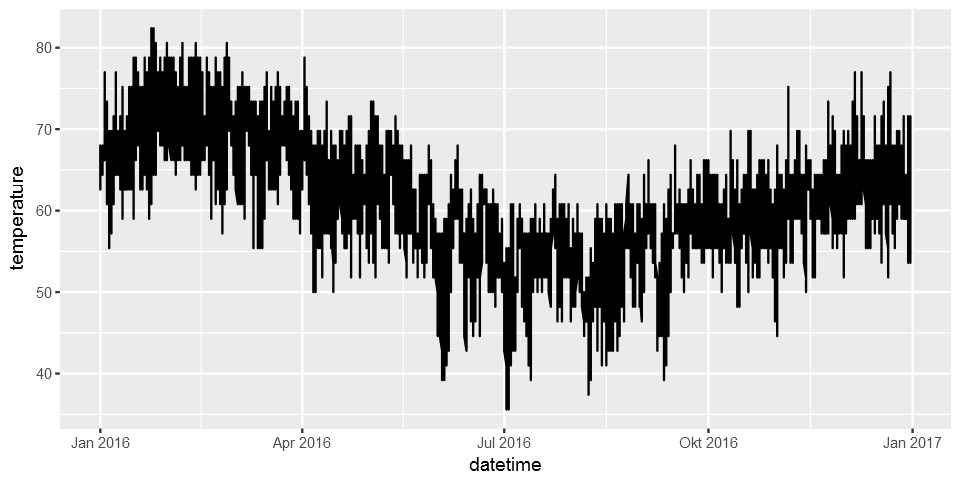

In [14]:
# Import "akl_weather_hourly_2016.csv"
akl_hourly_raw <- read_csv("akl_weather_hourly_2016.csv")

# Print akl_hourly_raw
akl_hourly_raw

# Use make_date() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = as.Date(datetime_string)
  )

# Print date, time and datetime columns of akl_hourly
akl_hourly %>% select(date, time, datetime)

# Plot to check work
ggplot(akl_hourly, aes(x = datetime, y = temperature)) + geom_line()

#### What can you extract?

In [10]:
# Use read_csv() to import rversions.csv
releases <- read_csv("rversions.csv")
release_time <- releases$datetime

# Examine the head() of release_time
head(release_time)

# Examine the head() of the months of release_time
head(month(release_time))

# Extract the month of releases 
month(release_time) %>% table()

# Extract the year of releases
year(release_time) %>% table()

# How often is the hour before 12 (noon)?
mean(hour(release_time) < 12)

# How often is the release in am?
mean(am(release_time))

Parsed with column specification:
cols(
  major = col_integer(),
  minor = col_integer(),
  patch = col_integer(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


[1] "1997-12-04 08:47:58 UTC" "1997-12-21 13:09:22 UTC"
[3] "1998-01-10 00:31:55 UTC" "1998-03-14 19:25:55 UTC"
[5] "1998-05-02 07:58:17 UTC" "1998-06-14 12:56:20 UTC"

[1] 12 12  1  3  5  6

.
 1  2  3  4  5  6  7  8  9 10 11 12 
 5  6  8 18  5 16  4  7  2 15  6 13 

.
1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   2   10    9    6    6    5    5    4    4    4    4    6    5    4    6    4 
2013 2014 2015 2016 2017 
   4    4    5    5    3 

[1] 0.752381

[1] 0.752381

#### Adding useful labels

Parsed with column specification:
cols(
  major = col_integer(),
  minor = col_integer(),
  patch = col_integer(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


.
 1  2  3  4  5  6  7 
 3 29  9 12 18 31  3 

.
  Sun   Mon  Tues   Wed Thurs   Fri   Sat 
    3    29     9    12    18    31     3 

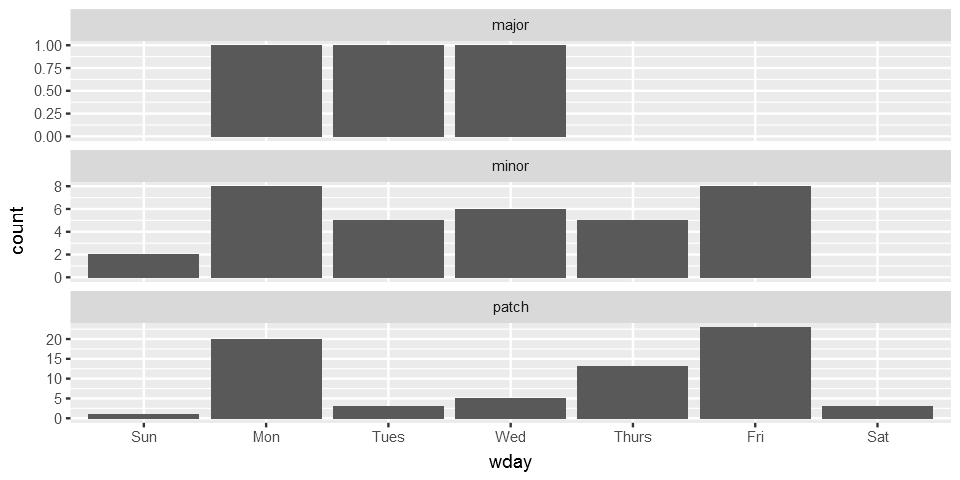

In [11]:
# Use read_csv() to import rversions.csv
releases <- read_csv("rversions.csv")
release_time <- releases$datetime

# Use wday() to tabulate release by day of the week
wday(releases$datetime) %>% table()

# Add label = TRUE to make table more readable
wday(releases$datetime, label = TRUE) %>% table()

# Create column wday to hold labelled week days
releases$wday <- wday(releases$datetime, label = TRUE)

# Plot barchart of weekday by type of release
ggplot(releases, aes(wday)) +
  geom_bar() +
  facet_wrap(~ type, ncol = 1, scale = "free_y")

#### Extracting for plotting

Parsed with column specification:
cols(
  date = col_character(),
  max_temp = col_integer(),
  min_temp = col_integer(),
  mean_temp = col_integer(),
  mean_rh = col_integer(),
  events = col_character(),
  cloud_cover = col_integer()
)
Warning message:
"Removed 1 rows containing missing values (geom_path)."

Warning message:
"Removed 10 rows containing non-finite values (stat_density)."

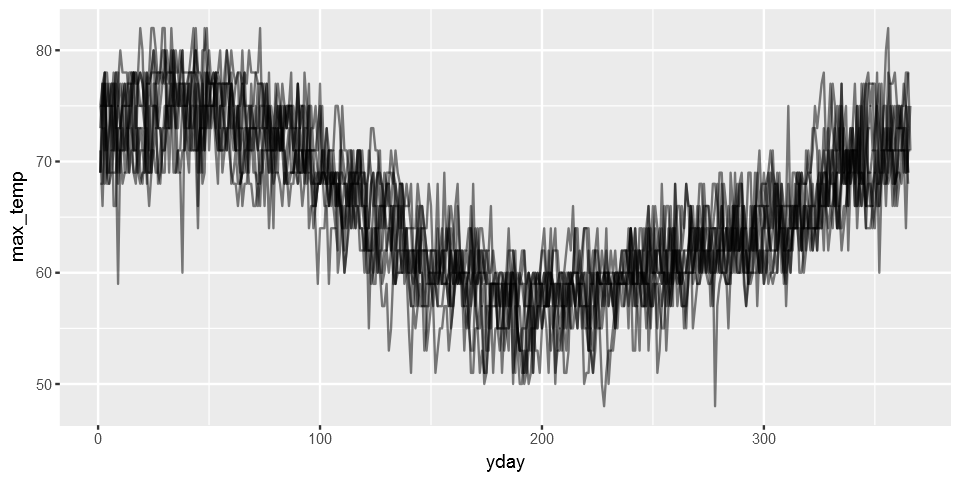

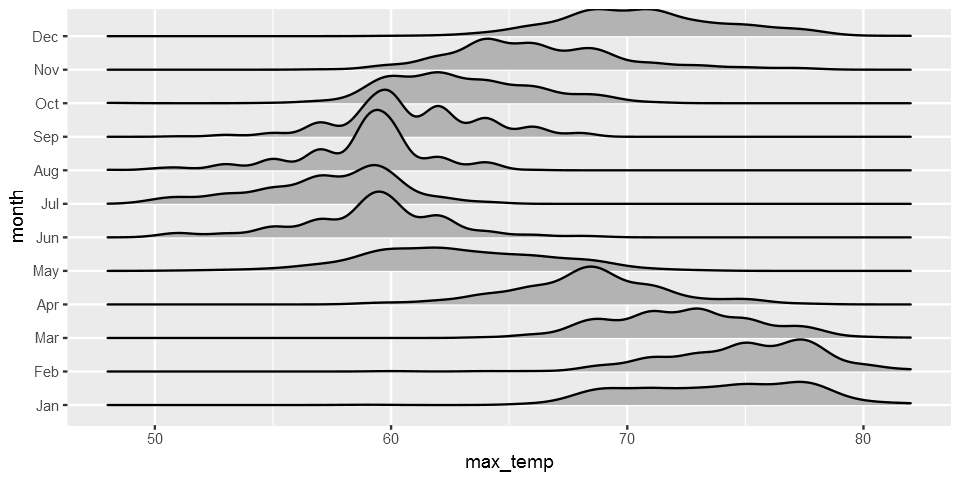

In [15]:
akl_daily <- read_csv("akl_weather_daily.csv")

# Add columns for year, yday and month
akl_daily <- akl_daily %>%
  mutate(
    year = year(date),
    yday = yday(date),
    month = month(date, label = TRUE))

# Plot max_temp by yday for all years
ggplot(akl_daily, aes(x = yday, y = max_temp)) +
  geom_line(aes(group = year), alpha = 0.5)

# Examine distribtion of max_temp by month
ggplot(akl_daily, aes(x = max_temp, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

#### Extracting for filtering and summarizing

In [17]:
# Import "akl_weather_hourly_2016.csv"
akl_hourly_raw <- read_csv("akl_weather_hourly_2016.csv")

# Use make_date() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday),
         datetime_string = paste(date, time, sep = "T"),
         datetime = ymd_hms(datetime_string))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
  )

# Create new columns hour, month and rainy
akl_hourly <- akl_hourly %>%
  mutate(
    hour = hour(datetime),
    month = month(datetime, label = TRUE),
    rainy = weather == "Precipitation"
  )

# Filter for hours between 8am and 10pm (inclusive)
akl_day <- akl_hourly %>% 
  filter(hour >= 8, hour <= 22)

# Summarise for each date if there is any rain
rainy_days <- akl_day %>% 
  group_by(month, date) %>%
  summarise(
    any_rain = any(rainy)
  )

# Summarise for each month, the number of days with rain
rainy_days %>% 
  summarise(
    days_rainy = sum(any_rain)
  )

Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  mday = col_integer(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_integer(),
  date_utc = col_datetime(format = "")
)


month,days_rainy
Jan,15
Feb,13
Mar,12
Apr,15
May,21
Jun,19
Jul,22
Aug,16
Sep,25
Oct,20


#### Practice rounding

In [18]:
r_3_4_1 <- ymd_hms("2016-05-03 07:13:28 UTC")

# Round down to day
floor_date(r_3_4_1, unit = "day")

# Round to nearest 5 minutes
round_date(r_3_4_1, unit = "5 minutes")

# Round up to week 
ceiling_date(r_3_4_1, unit = "week")

# Subtract r_3_4_1 rounded down to day
r_3_4_1 - floor_date(r_3_4_1, unit = "day")

[1] "2016-05-03 UTC"

[1] "2016-05-03 07:15:00 UTC"

[1] "2016-05-08 UTC"

Time difference of 7.224444 hours

#### Rounding with the weather data

In [20]:
# Create day_hour, datetime rounded down to hour
akl_hourly <- akl_hourly %>%
  mutate(
    day_hour = floor_date(datetime, unit = "hour")
  )

# Count observations per hour  
akl_hourly %>% 
  count(day_hour) 

# Find day_hours with n != 2  
akl_hourly %>% 
  count(day_hour) %>%
  filter(n != 2) %>% 
  arrange(desc(n))

day_hour,n
2016-01-01 00:00:00,2
2016-01-01 01:00:00,2
2016-01-01 02:00:00,2
2016-01-01 03:00:00,2
2016-01-01 04:00:00,2
2016-01-01 05:00:00,2
2016-01-01 06:00:00,2
2016-01-01 07:00:00,2
2016-01-01 08:00:00,2
2016-01-01 09:00:00,2


day_hour,n
2016-04-03 02:00:00,4
2016-09-25 00:00:00,4
2016-06-26 09:00:00,1
2016-09-01 23:00:00,1
2016-09-02 01:00:00,1
2016-09-04 11:00:00,1
2016-09-04 16:00:00,1
2016-09-04 17:00:00,1
2016-09-05 00:00:00,1
2016-09-05 15:00:00,1


# <font color=blue>Chapter 3:  Arithmetic with Dates and Times</font>

#### How long has it been?

In [4]:
Sys.setlocale(category = "LC_TIME", locale = "English_United States.1252")

# The date of landing and moment of step
date_landing <- mdy("July 20, 1969")
moment_step <- mdy_hms("July 20, 1969, 02:56:15", tz = "UTC")

# How many days since the first man on the moon?
difftime(today(), date_landing, units = "days")

# How many seconds since the first man on the moon?
difftime(now(), moment_step, units = "secs")

[1] "English_United States.1252"

Time difference of 17660 days

Time difference of 1525885784 secs

#### How many seconds are in a day?

In [5]:
# Three dates
mar_11 <- ymd_hms("2017-03-11 12:00:00", 
  tz = "America/Los_Angeles")
mar_12 <- ymd_hms("2017-03-12 12:00:00", 
  tz = "America/Los_Angeles")
mar_13 <- ymd_hms("2017-03-13 12:00:00", 
  tz = "America/Los_Angeles")

# Difference between mar_13 and mar_12 in seconds
difftime(mar_13, mar_12, units = "secs")

# Difference between mar_12 and mar_11 in seconds
difftime(mar_12, mar_11, units = "secs")


Time difference of 86400 secs

Time difference of 82800 secs

#### Adding or subtracting a time span to a datetime

In [6]:
# Add a period of one week to mon_2pm
mon_2pm <- dmy_hm("27 Aug 2018 14:00")
mon_2pm + weeks(1)

# Add a duration of 81 hours to tue_9am
tue_9am <- dmy_hm("28 Aug 2018 9:00")
tue_9am + dhours(81)

# Subtract a period of five years from today()
today() - years(5)

# Subtract a duration of five years from today()
today() - dyears(5)

[1] "2018-09-03 14:00:00 UTC"

[1] "2018-08-31 18:00:00 UTC"

[1] "2012-11-25"

[1] "2012-11-26"

#### Arithmetic with timespans

In [7]:
# Time of North American Eclipse 2017
eclipse_2017 <- ymd_hms("2017-08-21 18:26:40")

# Duration of 29 days, 12 hours, 44 mins and 3 secs
synodic <- ddays(29) + dhours(12) + dminutes(44) + dseconds(3)

# 223 synodic months
saros <- 223 * synodic

# Add saros to eclipse_2017
eclipse_2017 + saros


[1] "2035-09-02 02:09:49 UTC"

#### Generating sequences of datetimes

In [8]:
# Add a period of 8 hours to today
today_8am <- today() + dhours(8)

# Sequence of two weeks from 1 to 26
every_two_weeks <- 1:26 * weeks(2)

# Create datetime for every two weeks for a year
today_8am + every_two_weeks


 [1] "2017-12-09 08:00:00 UTC" "2017-12-23 08:00:00 UTC"
 [3] "2018-01-06 08:00:00 UTC" "2018-01-20 08:00:00 UTC"
 [5] "2018-02-03 08:00:00 UTC" "2018-02-17 08:00:00 UTC"
 [7] "2018-03-03 08:00:00 UTC" "2018-03-17 08:00:00 UTC"
 [9] "2018-03-31 08:00:00 UTC" "2018-04-14 08:00:00 UTC"
[11] "2018-04-28 08:00:00 UTC" "2018-05-12 08:00:00 UTC"
[13] "2018-05-26 08:00:00 UTC" "2018-06-09 08:00:00 UTC"
[15] "2018-06-23 08:00:00 UTC" "2018-07-07 08:00:00 UTC"
[17] "2018-07-21 08:00:00 UTC" "2018-08-04 08:00:00 UTC"
[19] "2018-08-18 08:00:00 UTC" "2018-09-01 08:00:00 UTC"
[21] "2018-09-15 08:00:00 UTC" "2018-09-29 08:00:00 UTC"
[23] "2018-10-13 08:00:00 UTC" "2018-10-27 08:00:00 UTC"
[25] "2018-11-10 08:00:00 UTC" "2018-11-24 08:00:00 UTC"

#### The tricky thing about months

In [10]:
jan_31 <- as.Date("2017-01-31")

# A sequence of 1 to 12 periods of 1 month
month_seq <- 1:12 * months(1)

# Add 1 to 12 months to jan_31
jan_31 + month_seq

# Replace + with %m+%
jan_31 %m+% month_seq

# Replace + with %m-%
jan_31 %m-% month_seq


[1] NA           "2017-03-31" NA           "2017-05-31" NA          
 [6] "2017-07-31" "2017-08-31" NA           "2017-10-31" NA          
[11] "2017-12-31" "2018-01-31"

[1] "2017-02-28" "2017-03-31" "2017-04-30" "2017-05-31" "2017-06-30"
 [6] "2017-07-31" "2017-08-31" "2017-09-30" "2017-10-31" "2017-11-30"
[11] "2017-12-31" "2018-01-31"

[1] "2016-12-31" "2016-11-30" "2016-10-31" "2016-09-30" "2016-08-31"
 [6] "2016-07-31" "2016-06-30" "2016-05-31" "2016-04-30" "2016-03-31"
[11] "2016-02-29" "2016-01-31"

#### Examining intervals. Reigns of kings and queens

##### Läuft nicht, da MONARCHS nicht vorhande 

In [11]:
# Print monarchs
 monarchs

# Create an interval for reign
monarchs <- monarchs %>%
  mutate(reign = from %--% to) 

# Find the length of reign, and arrange
monarchs %>%
  mutate(length = int_length(reign)) %>% 
  arrange(desc(length)) %>%
  select(name, length, dominion)


ERROR: Error in eval(expr, envir, enclos): Objekt 'monarchs' nicht gefunden


#### Comparing intervals and datetimes

In [12]:
# Print halleys
halleys

# New column for interval from start to end date
halleys <- halleys %>% 
  mutate(visible = start_date %--% end_date)

# The visitation of 1066
halleys_1066 <- halleys[14, ] 

# Monarchs in power on perihelion date
monarchs %>% 
  filter(halleys_1066$perihelion_date %within% reign) %>%
  select(name, from, to, dominion)

# Monarchs whose reign overlaps visible time
monarchs %>% 
  filter(int_overlaps(halleys_1066$visible, reign)) %>%
  select(name, from, to, dominion)


ERROR: Error in eval(expr, envir, enclos): Objekt 'halleys' nicht gefunden


#### Converting to durations and periods

In [13]:
# New columns for duration and period
monarchs <- monarchs %>%
  mutate(
    duration = as.duration(reign),
    period = as.period(reign)) 
    
# Examine results    
monarchs %>%
  select(name, duration, period)


ERROR: Error in eval(lhs, parent, parent): Objekt 'monarchs' nicht gefunden


# <font color=blue>Chapter 4:  Problems in practice</font>

#### Setting the timezone

In [14]:
# Game2: CAN vs NZL in Edmonton
game2 <- mdy_hm("June 11 2015 19:00")

# Game3: CHN vs NZL in Winnipeg
game3 <- mdy_hm("June 15 2015 18:30")

# Set the timezone to "America/Edmonton"
game2_local <- force_tz(game2, tzone = "America/Edmonton")
game2_local

# Set the timezone to "America/Winnipeg"
game3_local <- force_tz(game3, tzone = "America/Winnipeg")
game3_local

# How long does the team have to rest?
as.period(game2_local %--% game3_local)


[1] "2015-06-11 19:00:00 MDT"

[1] "2015-06-15 18:30:00 CDT"

[1] "3d 22H 30M 0S"

#### Viewing in a timezone

In [15]:
# What time is game2_local in NZ?
with_tz(game2_local, tzone = "Pacific/Auckland")

# What time is game2_local in Corvallis, Oregon?
with_tz(game2_local, tzone = "America/Los_Angeles")

# What time is game3_local in NZ?
with_tz(game3_local, tzone= "Pacific/Auckland")

[1] "2015-06-12 13:00:00 NZST"

[1] "2015-06-11 18:00:00 PDT"

[1] "2015-06-16 11:30:00 NZST"

#### Timezones in the weather data

In [25]:
# Import "akl_weather_hourly_2016.csv"
akl_hourly_raw <- read_csv("akl_weather_hourly_2016.csv")

# Use make_date() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )

# Examine datetime and date_utc columns
head(akl_hourly$datetime)
head(akl_hourly$date_utc)
  
# Force datetime to Pacific/Auckland
akl_hourly <- akl_hourly %>%
  mutate(
    datetime = force_tz(datetime, tzone = "Pacific/Auckland"))

# Reexamine datetime
head(akl_hourly$datetime)
  
# Are datetime and date_utc the same moments
table(akl_hourly$datetime - akl_hourly$date_utc)
  

Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  mday = col_integer(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_integer(),
  date_utc = col_datetime(format = "")
)


[1] "2016-01-01 00:00:00 UTC" "2016-01-01 00:30:00 UTC"
[3] "2016-01-01 01:00:00 UTC" "2016-01-01 01:30:00 UTC"
[5] "2016-01-01 02:00:00 UTC" "2016-01-01 02:30:00 UTC"

[1] "2015-12-31 11:00:00 UTC" "2015-12-31 11:30:00 UTC"
[3] "2015-12-31 12:00:00 UTC" "2015-12-31 12:30:00 UTC"
[5] "2015-12-31 13:00:00 UTC" "2015-12-31 13:30:00 UTC"

[1] "2016-01-01 00:00:00 NZDT" "2016-01-01 00:30:00 NZDT"
[3] "2016-01-01 01:00:00 NZDT" "2016-01-01 01:30:00 NZDT"
[5] "2016-01-01 02:00:00 NZDT" "2016-01-01 02:30:00 NZDT"


-82800      0   3600 
     2  17450      2 

#### Times without dates

Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  mday = col_integer(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_integer(),
  date_utc = col_datetime(format = "")
)


Classes 'hms', 'difftime'  atomic [1:17454] 0 1800 3600 5400 7200 9000 10800 12600 14400 16200 ...
  ..- attr(*, "units")= chr "secs"


00:00:00
00:30:00
01:00:00
01:30:00
02:00:00
02:30:00

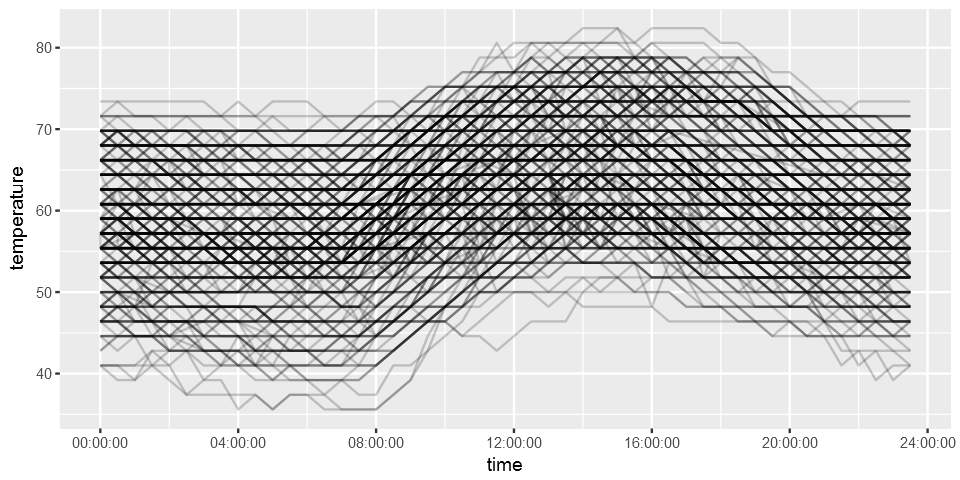

In [2]:
# Import auckland hourly data 
akl_hourly <- read_csv("akl_weather_hourly_2016.csv")

# Examine structure of time column
str(akl_hourly$time)

# Examine head of time column
head(akl_hourly$time)

# A plot using just time
ggplot(akl_hourly, aes(x = time, y = temperature)) +
  geom_line(aes(group = make_date(year, month, mday)), alpha = 0.2)


#### Fast parsing with `fasttime`

In [8]:
# Import auckland hourly data 
akl_hourly <- read_csv("akl_weather_hourly_2016.csv")

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    date = make_date(year = year, month = month, day = mday),
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )

dates <- akl_hourly$datetime

# Examine structure of dates
str(dates)

# Use fastPOSIXct() to parse dates
fastPOSIXct(dates) %>% str()

# Compare speed of fastPOSIXct() to ymd_hms()
summary(microbenchmark(
  ymd_hms = ymd_hms(dates),
  fasttime = fastPOSIXct(dates),
  times = 20))

Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  mday = col_integer(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_integer(),
  date_utc = col_datetime(format = "")
)


 POSIXct[1:17454], format: "2016-01-01 00:00:00" "2016-01-01 00:30:00" "2016-01-01 01:00:00" ...
 POSIXct[1:17454], format: "2016-01-01 01:00:00" "2016-01-01 01:30:00" "2016-01-01 02:00:00" ...


expr,min,lq,mean,median,uq,max,neval,cld
ymd_hms,107.95327,112.97651,120.8258,114.4047,116.5725,185.4198,20,b
fasttime,94.92963,98.34893,100.6843,101.0954,102.2438,111.9900,20,a


Fast parsing with `lubridate::fast_strptime`

In [22]:
# Import auckland hourly data 
akl_hourly <- read_csv("akl_weather_hourly_2016.csv")

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    date = make_date(year = year, month = month, day = mday),
    datetime = paste(date, time, sep = "T")
  )

dates <- akl_hourly$datetime
# Head of dates
head(dates)

# Parse dates with fast_strptime
fast_strptime(dates, 
    format = "%Y-%m-%dT%H:%M:%S") %>% str()

# Comparse speed to ymd_hms() and fasttime
summary(microbenchmark(
  ymd_hms = ymd_hms(dates),
  fasttime = fastPOSIXct(dates),
  fast_strptime = fast_strptime(dates, format = "%Y-%m-%dT%H:%M:%S"),
  times = 20))

Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  mday = col_integer(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_integer(),
  date_utc = col_datetime(format = "")
)


[1] "2016-01-01T00:00:00" "2016-01-01T00:30:00" "2016-01-01T01:00:00"
[4] "2016-01-01T01:30:00" "2016-01-01T02:00:00" "2016-01-01T02:30:00"

 POSIXlt[1:17454], format: "2016-01-01 00:00:00" "2016-01-01 00:30:00" "2016-01-01 01:00:00" ...


expr,min,lq,mean,median,uq,max,neval,cld
ymd_hms,10.353146,10.522285,11.446838,10.637643,13.207970,13.916132,20,b
fasttime,1.454917,1.482422,1.540020,1.496586,1.550776,1.844921,20,a
fast_strptime,1.147431,1.160979,1.344978,1.189920,1.240210,4.045770,20,a


#### Outputting pretty dates and times

In [23]:
finished <-  "I finished 'Dates and Times in R' on Thursday, September 20, 2017!"
# Create a stamp based on "Sep 20 2017"
date_stamp <- stamp("Sep 20 2017")

# Print date_stamp
date_stamp

# Call date_stamp on today()
date_stamp(today())

# Create and call a stamp based on "09/20/2017"
stamp("09/20/2017")(today())

# Use string finished for stamp()
stamp(finished)(today())

Multiple formats matched: "%b %d %y%H"(1), "%b %y %d%H"(1), "%b %d %Y"(1), "Sep %H %M%S"(1)
Using: "%b %d %Y"


function (x) 
format(x, format = "%b %d %Y")
<environment: 0x000000001da95018>

[1] "Nov 26 2017"

Multiple formats matched: "%m/%d/%y%H"(1), "%m/%y/%d%H"(1), "%m/%d/%Y"(1)
Using: "%m/%d/%Y"


[1] "11/26/2017"

Multiple formats matched: "I finished 'Dates and Times in R' on Thursday, %B %d, %y%H!"(1), "I finished 'Dates and Times in R' on Thursday, %B %y, %d%H!"(1), "I finished 'Dates and Times in R' on Thursday, %B %d, %Y!"(1), "I finished 'Dates and Times in R' on Thursday, September %H, %M%S!"(1)
Using: "I finished 'Dates and Times in R' on Thursday, %B %d, %Y!"


[1] "I finished 'Dates and Times in R' on Thursday, November 26, 2017!"